In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
students_performance = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')

In [3]:
students_performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
students_performance.shape

(1000, 8)

In [4]:
students_performance.describe() # Выдает описательную статистику

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [14]:
# Вывод первых трех строк и первых пяти колонок
students_performance.iloc[0:3, 0:5]

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none


In [15]:
students_performance.loc[:6]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


In [16]:
# Отбор студентов только с gender = female, выведем уровень лбразования и writing score
students_performance.loc[students_performance.gender == 'female', ['gender','parental level of education','writing score']]

,gender,parental level of education,writing score
0,female,bachelor's degree,74
1,female,some college,88
2,female,master's degree,93
5,female,associate's degree,78
6,female,some college,92
...,...,...,...
993,female,bachelor's degree,74
995,female,master's degree,95
997,female,high school,65
998,female,some college,77


In [17]:
mean_writing_score = students_performance['writing score'].mean()

In [18]:
# У какой доли студентов из датасэта в колонке lunch указано free/reduced
count_lunch_free = students_performance.loc[students_performance.lunch == 'free/reduced', 'lunch'].count()
count_all_lunch = students_performance.lunch.count()
count_lunch_free / count_all_lunch

0.355

In [19]:
# Как различается среднее и дисперсия оценок по предметам у групп студентов со стандартным или урезанным ланчем?
students_performance.loc[students_performance.lunch == 'standard', ['math score', 'reading score','writing score']].describe()

,math score,reading score,writing score
count,645.000000,645.000000,645.000000
mean,70.034109,71.654264,70.823256
std,13.653501,13.830602,14.339487
min,19.000000,26.000000,22.000000
25%,61.000000,63.000000,62.000000
50%,69.000000,72.000000,72.000000
75%,80.000000,82.000000,81.000000
max,100.000000,100.000000,100.000000


In [20]:
students_performance.loc[students_performance.lunch == 'free/reduced', ['math score', 'reading score','writing score']].describe()

,math score,reading score,writing score
count,355.000000,355.000000,355.000000
mean,58.921127,64.653521,63.022535
std,15.159956,14.895339,15.433823
min,0.000000,17.000000,10.000000
25%,49.000000,56.000000,53.000000
50%,60.000000,65.000000,64.000000
75%,69.000000,75.000000,74.000000
max,100.000000,100.000000,100.000000


In [21]:
# Фильтр колонок по названию
students_performance.filter(like = 'score').head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [22]:
students_performance['total_score'] = students_performance['reading score'] + students_performance['writing score'] + students_performance['math score']

In [23]:
students_performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [25]:
# Число ног героев игры Dota2
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv')

In [24]:
students_performance.assign(log_total_score = np.log(students_performance['total_score'])).head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,log_total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,5.384495
1,female,group C,some college,standard,completed,69,90,88,247,5.509388
2,female,group B,master's degree,standard,none,90,95,93,278,5.627621
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,4.997212
4,male,group C,some college,standard,none,76,78,75,229,5.433722


<AxesSubplot:>

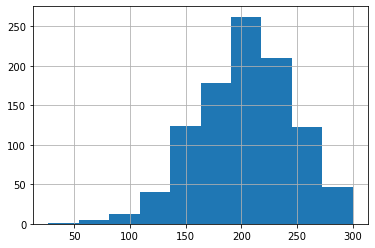

In [29]:
students_performance.total_score.hist() 

<AxesSubplot:xlabel='math score', ylabel='reading score'>

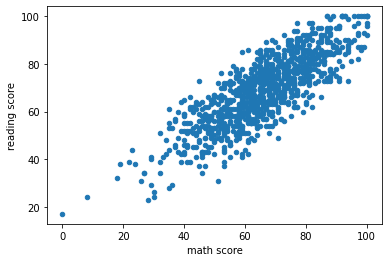

In [34]:
students_performance.plot.scatter(x = 'math score', y = 'reading score') 

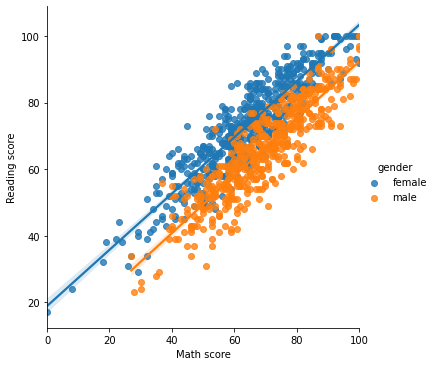

In [37]:
# Scatter plot в seaborn, группирующая пременная gender, вкючая регрессионые прямые
ax = sns.lmplot(x = 'math score', y = 'reading score', hue='gender', data=students_performance)
ax.set_xlabels('Math score')
ax.set_ylabels('Reading score')

In [26]:
df.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [27]:
leg_count_df = df.groupby('localized_name').agg({'legs':'sum'}).rename(columns = {'legs':'sum_legs'})

In [28]:
df.groupby('legs').nunique()

,Unnamed: 0,attack_type,id,localized_name,name,primary_attr,roles
legs,,,,,,,
0,11,2,11,11,11,3,11
2,95,2,95,95,95,3,81
4,7,2,7,7,7,3,7
6,3,2,3,3,3,3,3
8,1,1,1,1,1,1,1


In [59]:
# Подсчет числа кластеров, формируемых наблюдениями.
df = pd.read_csv(r"C:\Users\Mary\Desktop\Для GitHub\Pandas_training\dataset_209770_6 (1).txt", sep=" ")

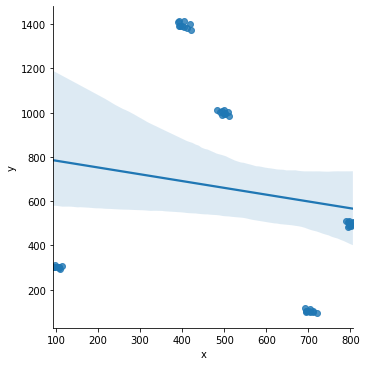

In [60]:
sns.lmplot(x = 'x', y = 'y', data=df)

In [9]:
# Данные - геномные расстояния между видами. Построение тепловой карты.
g = pd.read_csv('https://stepik.org/media/attachments/course/4852/genome_matrix.csv', index_col=0)

In [10]:
g.head()

,species0,species1,species2,species3,species4
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052
species3,0.840606,0.769754,0.003435,0.458870,0.029251
species4,0.430842,0.203214,0.096052,0.029251,0.642109


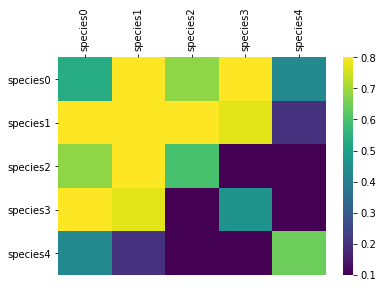

In [14]:
gx = sns.heatmap(g, cmap="viridis", vmin=0.1, vmax=0.8)
gx.xaxis.set_ticks_position('top')
gx.xaxis.set_tick_params(rotation=90)

In [28]:
# Любым удобным для вас способом создайте dataframe c именем my_data, 
# в котором две колонки c именами (type - строки, value - целые числа) и четыре наблюдения в каждой колонке:
type = ['A', 'A', 'B', 'B']
value = [10, 14, 12, 23]
my_data = pd.DataFrame({'type':type,'value':value})

In [26]:
my_data

,type,value
0,A,10
1,A,14
2,B,12
3,B,23


In [29]:
# В переменную с именем subset_1 сохраните только первые 10 строк и только 1 и 3 колонку.
# В переменную с именем subset_2 сохраните все строки кроме 1 и 5 и только 2 и 4 колонку.
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')

In [30]:
my_stat.head()

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0


In [33]:
subset_1 = my_stat[['V1','V3']].head(10)
subset_1

,V1,V3
0,2,B
1,-1,B
2,0,A
3,2,A
4,0,B
5,2,A
6,0,A
7,1,A
8,0,B
9,-1,A


In [45]:
subset_2 = my_stat[['V2','V4']].drop( index = [0, 4], axis=0)
subset_2

,V2,V4
1,7.0,1.0
2,11.0,0.0
3,11.0,2.0
5,11.0,0.0
6,9.0,2.0
...,...,...
495,8.0,-1.0
496,8.0,1.0
497,11.0,2.0
498,11.0,2.0


In [53]:
# В dataframe с именем my_stat четыре колонки V1, V2, V3, V4:
# В переменную subset_1 сохраните только те наблюдения, у которых значения переменной V1  строго больше 0, и значение переменной V3  равняется 'A'.
# В переменную  subset_2  сохраните только те наблюдения, у которых значения переменной V2  не равняются 10, или значения переменной V4 больше или равно 1.
# Как и в предыдущей задаче результат фильтрации - это тоже dataframe.
# Фильтрацию данных можно осуществить разными способами, например так или так.
subset_1 = my_stat.query('V1 > 0 & V3 == "A"')
subset_2 = my_stat.query('V2 != 10 | V4 >= 1')
subset_2

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
5,2,11.0,A,0.0
...,...,...,...,...
495,1,8.0,A,-1.0
496,3,8.0,A,1.0
497,-1,11.0,B,2.0
498,1,11.0,A,2.0


In [55]:
my_stat['V5']= my_stat['V1'] + my_stat['V4']
my_stat['V6']= np.log(my_stat.V2)

In [56]:
my_stat = my_stat.rename(columns = {'V1':'session_value', 'V2':'group', 'V3':'time', 'V4':'n_users'})

In [95]:
# В dataframe с именем my_stat сохранены данные с 4 колонками: session_value, group, time, n_users.  
# В переменной session_value замените все пропущенные значения на нули.
# В переменной n_users замените все отрицательные значения на медианное значение переменной n_users (без отриц. значений).
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat_1.csv')
my_stat

,session_value,time,group,n_users
0,0.0,12,B,9
1,NaN,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9
5,3.0,8,A,8
6,NaN,11,B,5
7,0.0,9,A,4
8,0.0,8,B,-11
9,0.0,9,A,-20


In [99]:
my_stat.session_value.fillna(0)

0    0.0
1    0.0
2    1.0
3    2.0
4    2.0
5    3.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: session_value, dtype: float64

In [120]:
subset = my_stat.query('n_users > 0')
my_median = subset.n_users.median()
my_stat.query('n_users < 0').replace(my_stat['n_users'], my_median)

,session_value,time,group,n_users
1,NaN,11,A,-1
8,0.0,8,B,-11
9,0.0,9,A,-20
